<a href="https://colab.research.google.com/github/Tonyjoyy/Stock-Correlation-analysis/blob/main/Stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

tickers_by_industry = {
    "Technology": ["MSFT", "ORCL", "PLTR"],
    "Semiconductors": ["NVDA", "AMD", "AVGO"],
    "Financial": ["V", "JPM", "BAC"],
    "Insurance": ["TRV", "UNH"],
    "IT": ["GOOGL", "META"],
    "Healthcare": ["LLY", "JNJ"],
    "Restaurants": ["MCD", "SBUX"],
    "Consumer Defensive": ["WMT", "COST", "KO"],
    "Consumer Cyclical": ["AMZN", "TSLA"]
}

all_tickers = []
for industry_tickers in tickers_by_industry.values():
    for ticker in industry_tickers:
        all_tickers.append(ticker)

# Get data
data = yf.download(all_tickers, start = '2021-01-01', end = '2025-01-01')['Close']

returns = data.pct_change().dropna()
window_size = 30

rolling_corr = returns.rolling(window=window_size).corr()

# Group by ticker pairs and compute the mean correlation
avg_rolling_corr = rolling_corr.groupby(level=1).mean()
avg_rolling_corr = avg_rolling_corr.reindex(index=all_tickers, columns=all_tickers, fill_value=0)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  22 of 22 completed


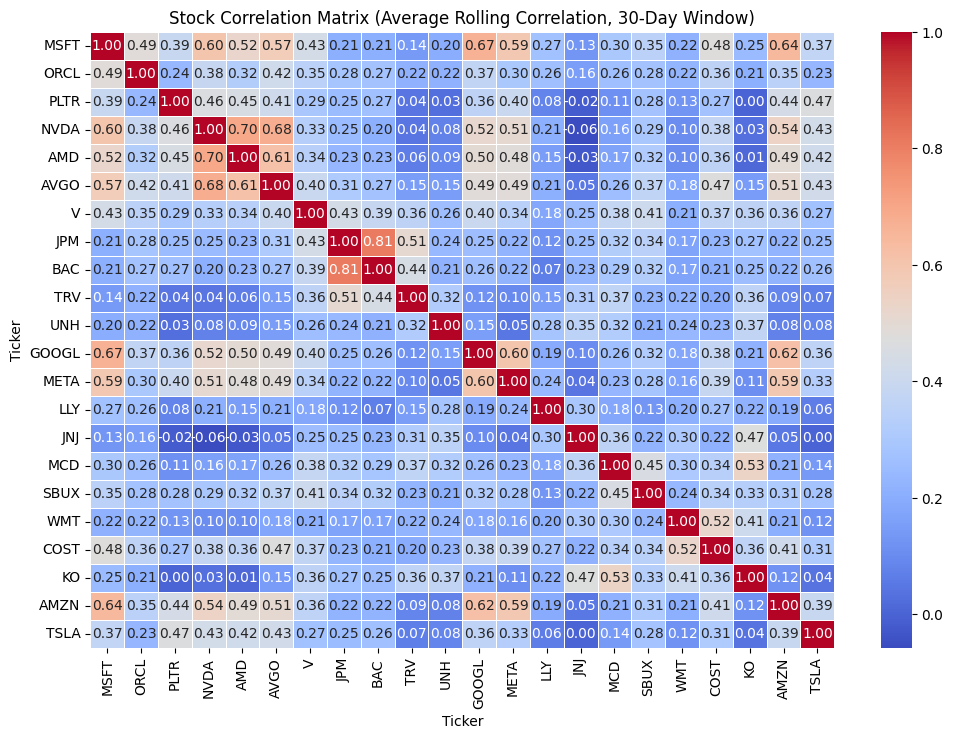

In [2]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(avg_rolling_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title(f"Stock Correlation Matrix (Average Rolling Correlation, {window_size}-Day Window)")
plt.show()